# Multi Linear Regression

# The goal of this project is to make a model that predicts profit for start ups.


In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [40]:
#Loading the data
profit_df = pd.read_csv('50_Startups.csv')
profit_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## <font color=magenta> EDA </font>

In [3]:
profit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#calculating the spread of data in State
profit_df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [5]:
profit_df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
profit_df.shape

(50, 5)

In [7]:
sns.set(style='white',font_scale=1.3)

In [8]:
profit_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


C:\Users\91775\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


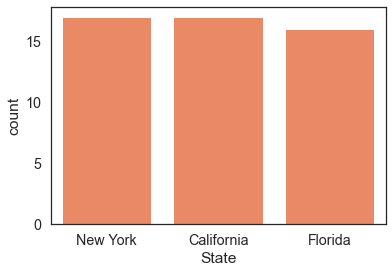

In [9]:
sns.countplot(profit_df['State'],color='Coral');

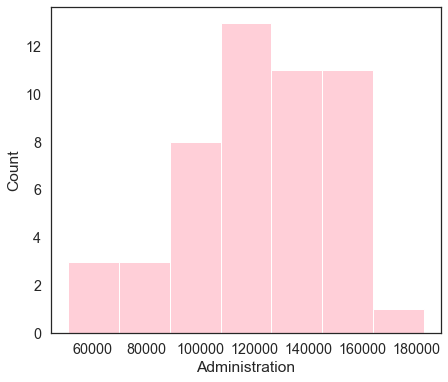

In [10]:
plt.figure(figsize=(7,6))
sns.histplot(profit_df['Administration'],color='pink');

C:\Users\91775\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


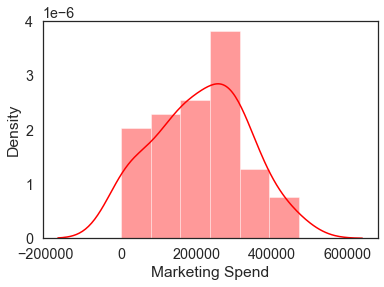

In [11]:
sns.distplot(profit_df['Marketing Spend'],color='red');

C:\Users\91775\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


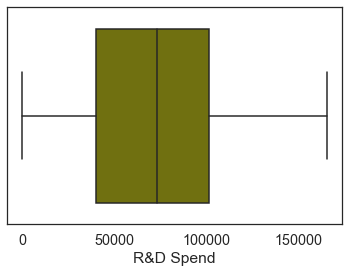

In [12]:
sns.boxplot(profit_df['R&D Spend'],color='olive',orient="h");

C:\Users\91775\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


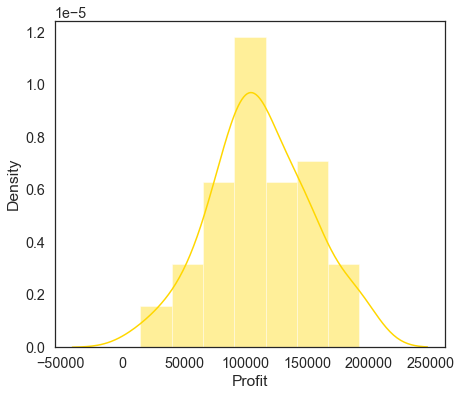

In [13]:
plt.figure(figsize=(7,6))
sns.distplot(profit_df['Profit'],color='gold');

<AxesSubplot:>

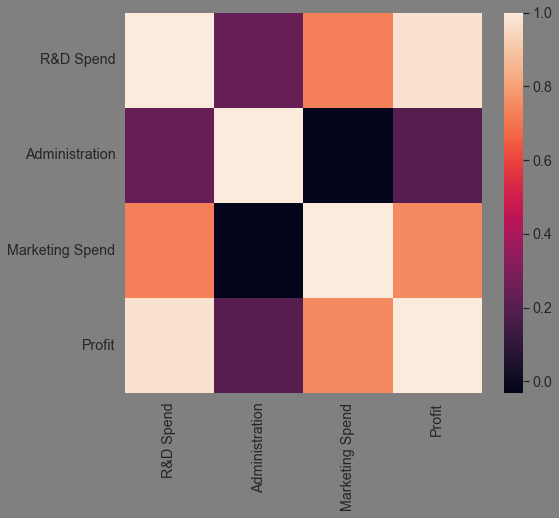

In [14]:
corr=profit_df.corr()
plt.figure(figsize=(8,7),facecolor='grey')
sns.heatmap(corr)

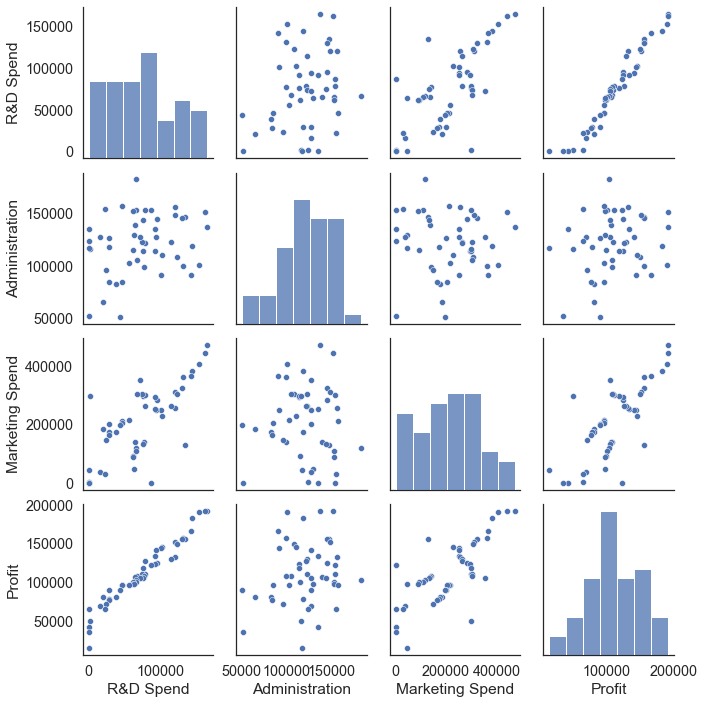

In [15]:
sns.pairplot(profit_df)

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

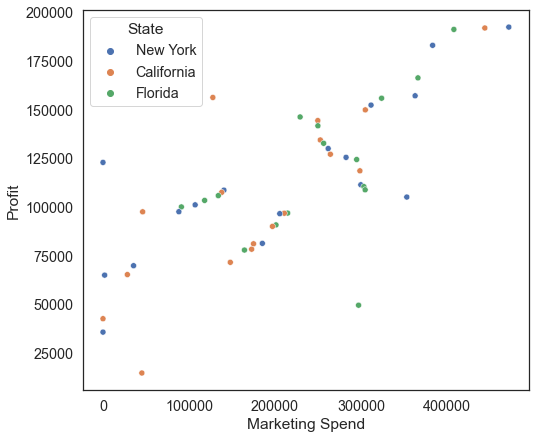

In [16]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='Marketing Spend',y='Profit',data=profit_df,hue='State')

**<font color=majenta>convering the categorical data into numerical values**

In [17]:
profit_df.replace({"State":{"New York":0,"California":1,"Florida":2}},inplace=True)
profit_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


**<font color=majenta>Separating the data into target and independent variables</font>**

In [18]:
X=profit_df.iloc[:,0:4]
Y=profit_df.iloc[:,-1]

Model Building

In [19]:
model = LinearRegression()

Training the model

In [20]:
model.fit(X,Y)

LinearRegression()

In [21]:
predicted=model.predict(X)
predicted

array([192380.47776923, 189136.73196692, 182258.5452987 , 173569.8957391 ,
       172257.08395351, 163457.13099751, 158149.16251674, 160134.25056651,
       151616.22724134, 154886.84673323, 135637.49679507, 135582.33329337,
       129256.81740214, 127485.64715981, 149669.76935995, 146122.1897743 ,
       116908.4178776 , 130064.80945604, 129125.44720981, 115560.3396927 ,
       116626.50011056, 117181.43585233, 114809.10921281, 110099.20778473,
       113265.90604558, 102248.68224085, 110733.61162468, 114261.61959473,
       101786.58057561, 101691.64635406,  99594.48431042,  97586.8972147 ,
        99032.15366377,  98032.20947717,  89026.3576401 ,  90393.52670572,
        75393.03541918,  89626.81909106,  69578.10041077,  83733.46946241,
        74811.49698385,  74923.79414443,  70623.07091169,  60065.79935976,
        64627.61465015,  47551.89764388,  56246.51436723,  46508.47225505,
        49085.2576502 ,  48227.06843893])

In [22]:
from sklearn.metrics import r2_score
r2score= r2_score(Y,predicted)
print("The r2score is {}".format(r2score))

The r2score is 0.9507516438334586


In [23]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(Y,predicted)
print("The Mean absolute error is {}".format(MAE))

The Mean absolute error is 6468.386693409221


**Predictions**

In [24]:
new_data=pd.DataFrame({"R&D Spend":153441,"Administration":101145,"Marketing Spend":407934,"State":2},index=[1])
model.predict(new_data)

array([182258.13446235])

**Taking input from user**

In [25]:
x,y,z,a=input("Enter the amount for R&D Spend,Administration,Marketing spend,State").split(",")
pdata=pd.DataFrame({"R&D Spend":x,"Administration":y,"Marketing Spend":z,"State":a},index=[1])
p=model.predict(pdata)
print("The profit is {}".format(p))

Enter the amount for R&D Spend,Administration,Marketing spend,State50000,6565656,188888,2
The profit is [-81498.74298729]


### **<font color=pink>The model has rsquare value of 0.95.**

<AxesSubplot:>

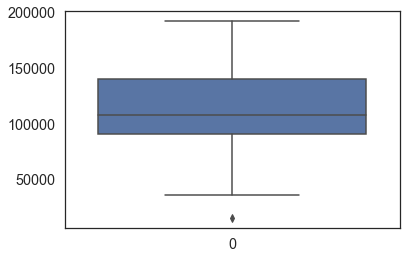

In [26]:
sns.boxplot(data=profit_df['Profit'])

**Finding ouliers and making a efficient model**

In [37]:
filter_data=profit_df[(profit_df['Profit']<20000)]
filter_data

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,1,14681.4


In [45]:
final_data=profit_df.drop(profit_df.index[[49]])
final_data.replace({"State":{"New York":0,"California":1,"Florida":2}},inplace=True)
final_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [48]:
X1=final_data.iloc[:,0:4]
Y1=final_data['Profit']

In [38]:
final_model=LinearRegression()

In [49]:
final_model.fit(X1,Y1)

LinearRegression()

In [50]:
predictions1=final_model.predict(X1)

In [53]:
final_model_rsquare=r2_score(Y1,predictions1)
print("The R square value for the final model is {}".format(final_model_rsquare))

The R square value for the final model is 0.9613410000906566


In [55]:
pd.DataFrame({"models":["model","final_model"],"Rsquare value":[0.9507,0.9613]})

,models,Rsquare value
0,model,0.9507
1,final_model,0.9613


*There is 1% improvement in our model after removig the outliers.*